<a href="https://colab.research.google.com/github/awannabecs/MY-FUNCTION-NAME/blob/main/PROJECT_1_TEXT_CLASSIFICATION_DEPRESSION_DETECTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [150]:
#import the libraries 
import numpy as  np
import pandas as pd 
import tensorflow as tf
import nltk 
import re
import matplotlib.pyplot as plt 
nltk.download("punkt")
tokenizer = nltk.word_tokenize
tokenizer("go out")
stemmer = nltk.PorterStemmer().stem
stemmer("played")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


'play'

In [151]:
#import the dataset
df = pd.read_csv("/content/drive/MyDrive/MAIN_DATA")
df.dropna(inplace=False)

,Unnamed: 0,Unnamed: 0.1,depressed,text
0,0,0.0,0.0,I know where you're coming from mate.
1,1,1.0,0.0,I felt like this last year.
2,2,2.0,1.0,"I remember around this time last year, i was h..."
3,3,3.0,1.0,"i was heavily addicted to meth, it was literal..."
4,4,4.0,0.0,"I worked like 70+hours in a warehouse job, 2 h..."
...,...,...,...,...
1790,178,1210.0,1.0,hate shattered me
1791,179,1212.0,1.0,but I know depression and drug addiction don'...
1792,180,1233.0,1.0,I feel a lot of deeply depressed souls have d...
1793,181,1234.0,1.0,anxiety and mental breakdowns...|0|0|0|


In [152]:
#create the word2number dictionary
tokens = []
for i in range(len(df)):
  words = []
  try:
    words.extend(tokenizer(df.iloc[i]["text"].lower()))
    for word in words:
      word = word
      tokens.append(stemmer(word))
  except Exception as e:
    print(df.iloc[i]["text"])

tokens = set(tokens)

nan
nan
nan
nan
nan


In [153]:
somelist = [" '//twitter.com/ltsharrypotter/status/984475138933579782',", '//t.co/yacazn2t0h',
            "dk_mok", '70+hour', 'much|1|0|4|', 'collection|1|0|3|',"20",]
pattern = """\/?\/?twitter.com/.+|
\/?\/?t.co\/?.+|  
_|
\d+|
\|d\|\d\|\d|
"""
for word in somelist:
  word = re.sub(pattern,"",word)
  print(word)

 '
//t.co/yacazn2t0h
dk_mok
70+hour
much|1|0|4|
collection|1|0|3|
20


In [154]:
token2index_dict = {"OOV":0}
index2token_dict = {0:"OOV"}
for index,token in enumerate(tokens):
  token2index_dict[token] = index+1
  index2token_dict[index+1] = token

In [155]:
def token2index_function(dict,sent):
  result_sent = []
  for token in sent.split(" "):
    result_sent.append(dict.get(token,0))
  return result_sent


def index2token_function(dict,index):
  return dict.get(index,"OOV")

In [156]:
#make the sentences same-lengthed 
#find the max length
max_length = 0
for sent in range(len(df)):
  try:
    words = nltk.word_tokenize(df.iloc[sent]["text"])
  except Exception as e:
    print(df.iloc[sent]["text"])
  if len(words) > max_length:
    max_length = len(words)

nan
nan
nan
nan
nan


In [157]:
vector = [1,2,3,4,5,6,7,8]
def same_lengther(vector,max_length):
  zeros = np.zeros(max_length - len(vector))
  vector.extend(zeros)
  return vector

In [158]:
#define X and y
X = []
y = []
X_vector = []


for i in range(len(df)):
  feature = df["text"].iloc[i]
  label = int(df["depressed"].iloc[i])

  try:
    feature_vector = token2index_function(token2index_dict,feature)
    X_vector.append(same_lengther(feature_vector,max_length))
    y.append(label)
    X.append(feature.lower())
  except Exception as e:
    print(i)
    


534
727
979
1019
1242


In [159]:
X_vector = np.array(X_vector).astype("float32")
y = np.array(y).astype("float32")

X_vector.shape,y.shape
y = pd.get_dummies(y)

In [160]:
tf.random.set_seed(666)
model1 = tf.keras.Sequential()
model1.add(tf.keras.layers.Dense(128,activation="relu"))
model1.add(tf.keras.layers.Dense(64,activation="relu"))
model1.add(tf.keras.layers.Dense(32,activation="relu"))
model1.add(tf.keras.layers.Dense(16,activation="relu"))
model1.add(tf.keras.layers.Dense(8,activation="relu"))
model1.add(tf.keras.layers.Dense(4,activation="relu"))
model1.add(tf.keras.layers.Dense(2,activation="sigmoid"))

model1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["accuracy"])

model1.fit(X_vector,y,epochs=100)

Epoch 1/100
81/81 [==============================] - 1s 3ms/step - loss: 6.9467 - accuracy: 0.5205
Epoch 2/100
81/81 [==============================] - 0s 3ms/step - loss: 0.7126 - accuracy: 0.4986
Epoch 3/100
81/81 [==============================] - 0s 3ms/step - loss: 0.6941 - accuracy: 0.5010
Epoch 4/100
81/81 [==============================] - 0s 3ms/step - loss: 0.6930 - accuracy: 0.5018
Epoch 5/100
81/81 [==============================] - 0s 3ms/step - loss: 0.6928 - accuracy: 0.5018
Epoch 6/100
81/81 [==============================] - 0s 3ms/step - loss: 0.6928 - accuracy: 0.5018
Epoch 7/100
81/81 [==============================] - 0s 3ms/step - loss: 0.6928 - accuracy: 0.5018
Epoch 8/100
81/81 [==============================] - 0s 3ms/step - loss: 0.6928 - accuracy: 0.5018
Epoch 9/100
81/81 [==============================] - 0s 3ms/step - loss: 0.6928 - accuracy: 0.5018
Epoch 10/100
81/81 [==============================] - 0s 3ms/step - loss: 0.6928 - accuracy: 0.5018
Epoch 11/

In [199]:
y.iloc[1]

0.0    1
1.0    0
Name: 1, dtype: uint8



---

---



# ***since we are getting aweful results, we geuess that our vectors are too sparse, so first we try to plot a histogram to see how many instances of different sizes we have.***

---


---




In [161]:
#get a list of the length of the sentences 
len_sentences_list = []
for i in range(len(df)):
  try:
    words = nltk.word_tokenize(df["text"].iloc[i])
    len_sentences_list.append(len(words))
  except Exception as e:
    print(df["text"].iloc[i])

nan
nan
nan
nan
nan


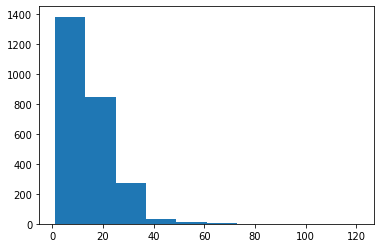

In [162]:
#plot the list as a histogram
plt.hist(len_sentences_list)
plt.show()



---



---


# ***as you can see, we only have under 100 sentences with the length of 40,let alone the 121...so it's better to change the padding by setting the maximum length to be around 40 so we would not have such sparse vectors***
---



---



In [201]:
model1_X = []
model1_y = []
len_sentences_list = []
for i in range(len(X)):
  words = nltk.word_tokenize(X[i])
  if len(words) <= 40:
    model1_X.append(X[i])
    len_sentences_list.append(len(words))
    model1_y.append(i)

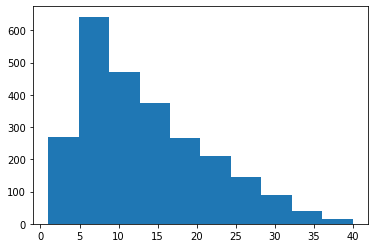

In [202]:
#let's replot the histogram to see what happened
plt.hist(len_sentences_list)
plt.show()


---


---

# ***That looks better***



---



---



In [203]:
model1_X_vectors = []
for sentence in model1_X:
  index_tokens = token2index_function(token2index_dict,sentence)
  model1_X_vectors.append(np.array(same_lengther(index_tokens,40)))  

model1_y = np.array(model1_y).astype("float32")
model1_y = pd.get_dummies(model1_y)

In [204]:
model1_y.iloc[9]

0.0       0
1.0       0
2.0       0
3.0       0
4.0       0
         ..
2560.0    0
2561.0    0
2562.0    0
2563.0    0
2564.0    0
Name: 9, Length: 2526, dtype: uint8

In [174]:
tf.random.set_seed(666)
model1 = tf.keras.Sequential()
model1.add(tf.keras.layers.Dense(128,activation="relu"))
model1.add(tf.keras.layers.Dense(64,activation="relu"))
model1.add(tf.keras.layers.Dense(32,activation="relu"))
model1.add(tf.keras.layers.Dense(16,activation="relu"))
model1.add(tf.keras.layers.Dense(8,activation="relu"))
model1.add(tf.keras.layers.Dense(4,activation="relu"))
model1.add(tf.keras.layers.Dense(2,activation="sigmoid"))

model1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["accuracy"])

model1.fit(model1_X_vectors,model1_y,epochs=100)

ValueError: ignored